## 🏠 Part II. King County House Prices — Feature engineering & Model training/evaluation

In [1]:
# Basic package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train/Test split
from sklearn.model_selection import train_test_split

# Normalization/Standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Classfier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC

# Ensemble methods
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1️⃣ Load final dataset (after cleaning part)

In [2]:
df=pd.read_csv(r"C:\Users\SAMSUNG\Desktop\Project2\king_ country_ houses_aa.csv")
house=df.copy()

In [3]:
#data cleaning where the number of bedrooms and bathrooms is 0
house = house[~((house["bedrooms"] <= 0) | (house["bathrooms"] <= 0))]

In [4]:
#changing dtype of date to datetime
house['date']=pd.to_datetime(house['date'])
#adding two new columns 'sale_year' and 'house_age'
house['sale_year']=house['date'].dt.year
house['house_age']=house['sale_year']-house['yr_built']

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   21597 non

## 2️⃣ Train baseline model

- Linear regression
- KNN Regressor
- Decision Tree
- AdaBoost
- Gradient Boosting
- XGBoost
- Random Forest


In [6]:
house1=house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'yr_built', 'lat', 'long', 'price']]
house1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21597 non-null  int64  
 1   bathrooms    21597 non-null  float64
 2   sqft_living  21597 non-null  int64  
 3   sqft_lot     21597 non-null  int64  
 4   floors       21597 non-null  float64
 5   grade        21597 non-null  int64  
 6   yr_built     21597 non-null  int64  
 7   lat          21597 non-null  float64
 8   long         21597 non-null  float64
 9   price        21597 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.8 MB


##### 1. Linear regression

In [7]:
#Split the dataset
X=house1.drop('price', axis=1)
y=house1['price']

In [8]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

y_test_pred=lm.predict(X_test)
y_train_pred=lm.predict(X_train)

In [9]:
# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 46638548641.99
R-squared Score: 0.64
Train set
Mean Squared Error: 46814491590.45
R-squared Score: 0.66


##### 2. KNN Regressor

In [10]:
#Split the dataset
X=house1.drop('price', axis=1)
y=house1['price']

In [11]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#KNN Regressor
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

y_test_pred=knn.predict(X_test)
y_train_pred=knn.predict(X_train)

In [12]:
# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 73656107528.94
R-squared Score: 0.43
Train set
Mean Squared Error: 45161321529.75
R-squared Score: 0.67


##### 3. XGBoost

In [13]:
#Split the dataset
X=house1.drop('price', axis=1)
y=house1['price']

In [14]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#KNN Regressor
xgbo = xgb.XGBRegressor(random_state=42)
xgbo.fit(X_train, y_train)

y_test_pred=xgbo.predict(X_test)
y_train_pred=xgbo.predict(X_train)

In [15]:
# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 21149840055.88
R-squared Score: 0.84
Train set
Mean Squared Error: 5063527783.27
R-squared Score: 0.96


##### 4. Random Forest

In [16]:
#Split the dataset
X=house1.drop('price', axis=1)
y=house1['price']

In [ ]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#RandomForest
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

y_test_pred=rf.predict(X_test)
y_train_pred=rf.predict(X_train)

In [18]:
# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 18633006305.78
R-squared Score: 0.86
Train set
Mean Squared Error: 3123587092.85
R-squared Score: 0.98


##### 5. ADAboost

In [19]:
#Split the dataset
X=house1.drop('price', axis=1)
y=house1['price']

In [20]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create adaboost classifer object
abc = AdaBoostRegressor(random_state=42)
abc.fit(X_train, y_train)

#Predict the response for test dataset
y_test_pred = abc.predict(X_test)
y_train_pred = abc.predict(X_train)


In [21]:
# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 86336103504.53
R-squared Score: 0.34
Train set
Mean Squared Error: 80788004763.93
R-squared Score: 0.41


##### Comparing the models

In [23]:
X=house1.drop('price', axis=1)
y=house1['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
               Model     Train_MSE      Test_MSE  Train_R2   Test_R2
3      Random Forest  3.123587e+09  1.863301e+10  0.977023  0.856773
6            XGBoost  5.063528e+09  2.114984e+10  0.962753  0.837427
5  Gradient Boosting  1.922401e+10  2.215076e+10  0.858590  0.829733
2      Decision Tree  8.054395e+07  3.340677e+10  0.999408  0.743211
0  Linear Regression  4.681449e+10  4.663855e+10  0.655638  0.641502
1      KNN Regressor  4.516132e+10  7.365611e+10  0.667798  0.433825
4           AdaBoost  8.078800e+10  8.633610e+10  0.405732  0.336357


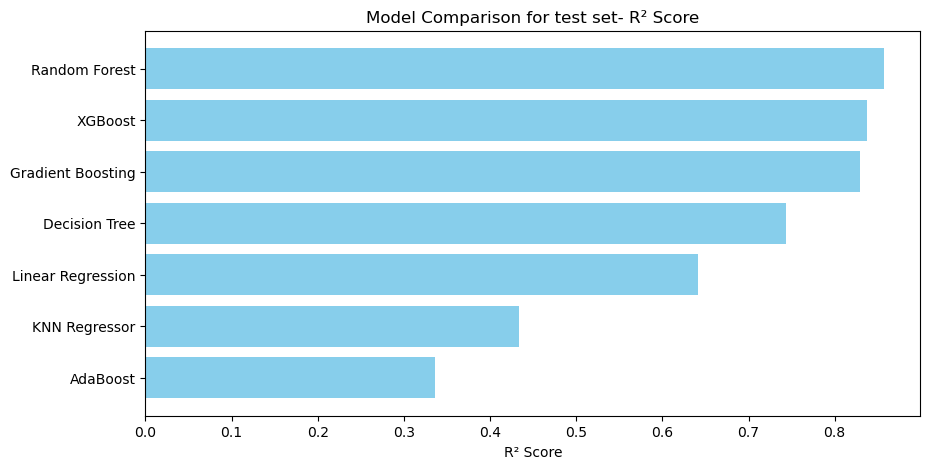

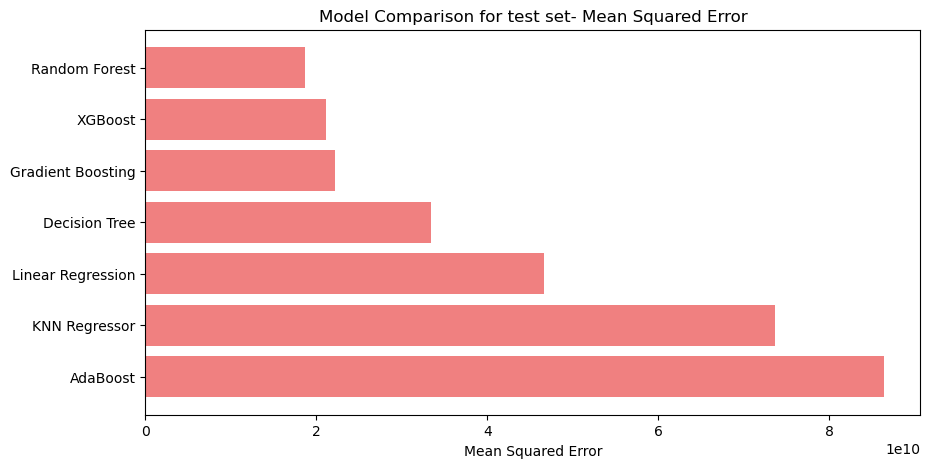

In [24]:
# Visualization

plt.figure(figsize=(10,5))
plt.barh(results_df["Model"], results_df["Test_R2"], color='skyblue')
plt.xlabel("R² Score")
plt.title("Model Comparison for test set- R² Score")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10,5))
plt.barh(results_df["Model"], results_df["Test_MSE"], color='lightcoral')
plt.xlabel("Mean Squared Error")
plt.title("Model Comparison for test set- Mean Squared Error")
plt.gca().invert_yaxis()
plt.show()

## 3️⃣ Feature engineering & Model evaluation

#### 1) Feature engineering - PRICE

- price capping over Q3
- Log-transformation 

#### 2) Scaling - Standardization

#### 3) Hyperparameter Tuning
-RandomizedSearchCV

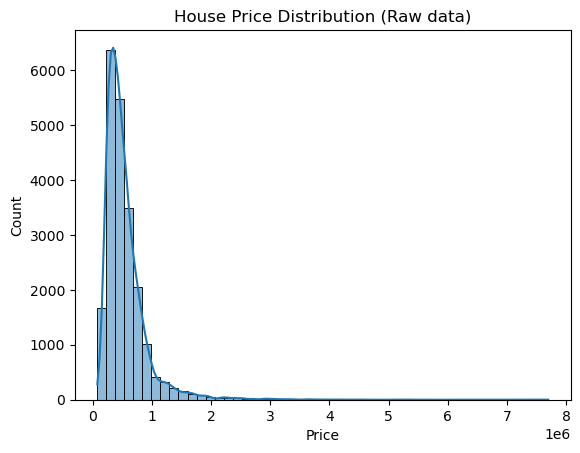

In [25]:
sns.histplot(house1['price'], bins=50, kde=True)
plt.title("House Price Distribution (Raw data)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()
plt.show()

In [27]:
house1['price'].describe()

count    2.159700e+04
mean     5.402029e+05
std      3.671337e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

##### Price capping at Q3

In [28]:
Q3 = house1["price"].quantile(0.75)

In [29]:
house1["price_cap_lower"] = house1["price"].clip(upper=Q3)
house1["price_cap_upper"] = house1["price"].clip(lower=Q3)

In [30]:
house2=house1.copy()

In [31]:
house_cap_upper=house1.drop(['price','price_cap_upper'], axis=1)

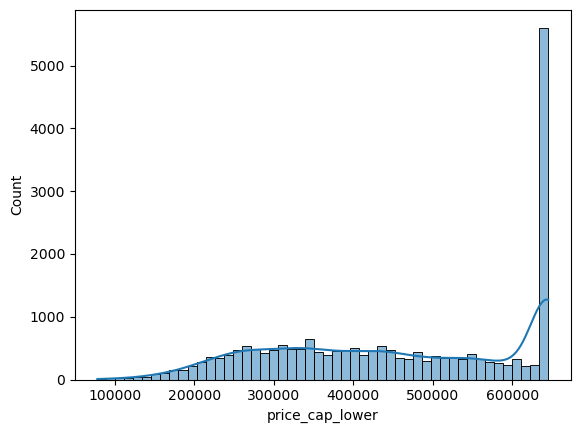

In [32]:
sns.histplot(house_cap_upper['price_cap_lower'], bins=50, kde=True)
plt.show()

In [56]:
X=house_cap_upper.drop('price_cap_lower', axis=1)
y=house_cap_upper['price_cap_lower']

In [57]:
#XGBoost vs RandomForest

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
           Model     Train_MSE      Test_MSE  Train_R2   Test_R2
1        XGBoost  1.395870e+09  3.008832e+09  0.941847  0.874466
0  Random Forest  4.934715e+08  3.151411e+09  0.979442  0.868518


#### Why price capping improve the performance on test set?

🎯 Tree-based models and regressors can overfit to extreme target values (outliers).

By capping those extremes, the model’s predictions focus more on the majority of homes, reducing variance.
This makes it easier for the model to generalize, improving test R² or MSE (both sensitive to large errors).
It reduced variance and overfitting.

1. Bias the dataset.

After capping, this model is no longer predicting true house prices (luxury/high-end homes accurately).
It’s predicting capped prices — i.e., “price up to Q3.”

✅ If the goal is to predict normal/mid-market homes, this is fine.
❌ But if the goal is to model the entire market, you’re biasing the dataset.

2. Outliers are often real and meaningful
Expensive homes (above Q3) are not necessarily errors — they are a valid part of the market.
Instead of capping, use a log transformation:
house1["price_log"] = np.log1p(house1["price"])

This compresses the high-end prices while keeping their relative differences.
Models handle log-scaled targets much better.
Then, when predicting, you can invert with np.expm1(predictions).

✅ This is generally preferred to capping.


##### Log transformation on price

In [58]:
house1["price_log"] = np.log1p(house1["price"])

In [59]:
house3=house1.copy()

In [60]:
X=house1.drop(['price', 'price_cap_lower', 'price_cap_upper', 'price_log'], axis=1)
y=house1.price_log

In [61]:
#XGBoost vs RandomForest

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
           Model  Train_MSE  Test_MSE  Train_R2   Test_R2
1        XGBoost   0.015462  0.031524  0.944442  0.884205
0  Random Forest   0.005474  0.033116  0.980331  0.878358


🧮 Log_transformation on price has improve the r2 score on test set for both XGBoost and RandomForest

##### Standardization

In [70]:
#scale from house_cap
from sklearn.preprocessing import StandardScaler

In [71]:
num1=house1[['sqft_living', 'sqft_lot', 'yr_built']]
cat1=house1[['bathrooms', 'bedrooms', 'floors', 'grade', 'lat', 'long', 'price_log']]

In [72]:
scaler = StandardScaler()
num_cap = scaler.fit_transform(num1)

In [73]:
num_scale =pd.DataFrame(num_cap, columns=num1.columns, index=house1.index)

In [74]:
house_scale=pd.concat([num_scale, cat1], axis=1)

In [75]:
house_scale

,sqft_living,sqft_lot,yr_built,bathrooms,bedrooms,floors,grade,lat,long,price_log
0,-0.980652,-0.228182,-0.544678,1.00,3,1.0,7,47.5112,-122.257,12.309987
1,0.533369,-0.189739,-0.680850,2.25,3,2.0,7,47.7210,-122.319,13.195616
2,-1.427234,-0.123139,-1.293626,1.00,2,1.0,6,47.7379,-122.233,12.100718
3,-0.131057,-0.243878,-0.204247,3.00,4,1.0,7,47.5208,-122.393,13.311331
4,-0.436040,-0.169503,0.544700,2.00,3,1.0,8,47.6168,-122.045,13.142168
...,...,...,...,...,...,...,...,...,...,...
21608,-0.599424,-0.337306,1.293648,2.50,3,3.0,8,47.6993,-122.346,12.793862
21609,0.250171,-0.224246,1.463863,2.50,4,2.0,8,47.5107,-122.362,12.899222
21610,-1.154928,-0.332018,1.293648,0.75,2,2.0,7,47.5944,-122.299,12.904461
21611,-0.523178,-0.306952,1.123432,2.50,3,2.0,8,47.5345,-122.069,12.899222


In [76]:
X=house_scale.drop(['price_log'], axis=1)
y=house_scale.price_log

In [77]:
#XGBoost vs RandomForest

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
           Model  Train_MSE  Test_MSE  Train_R2   Test_R2
1        XGBoost   0.015462  0.031559  0.944442  0.884077
0  Random Forest   0.005478  0.033094  0.980318  0.878437


🧮 Standardization doesn't change any performnce

##### Hyperparameter Tuning

Randomized Search CV

In [78]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

XGBoost

In [79]:
X=house_scale.drop(['price_log'], axis=1)
y=house_scale.price_log

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

param_dist = {
    'n_estimators': np.arange(100, 300, 500),
    'max_depth': np.arange(5, 7, 10),
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.05, 0.1, 0.2],
    'reg_lambda': [0.5, 1, 2],
    'reg_alpha': [0, 0.2, 0.5, 1]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,          # number of random combinations to try
    cv=3,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters found:", random_search.best_params_)
print("Best R² score (CV):", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found: {'subsample': 0.9, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': np.int64(100), 'max_depth': np.int64(5), 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
Best R² score (CV): 0.8776494571966703


In [81]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))

Test MSE: 0.03190903822954371
Test R²: 0.8827904981343979


RandomForest

In [102]:
X=house_scale.drop(['price_log'], axis=1)
y=house_scale.price_log

In [103]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define parameter distribution for sampling
param_dist = {
    'n_estimators': [100, 200, 300, 500],   # number of trees
    'max_depth': [None, 10, 20, 30],        # tree depth
    'min_samples_split': [2, 5, 10],        # min samples to split
    'min_samples_leaf': [1, 2, 4],          # min samples per leaf
    'max_features': ['sqrt', 'log2', None]  # number of features per split
}
#total number of combination=4*4*3*3*3 (432)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                 # number of random hyperparameter combinations to try out of total hyperparameter combination(432)
    cv=3,                      # 3-fold cross-validation (faster than 5)
    scoring='neg_mean_squared_error',
    n_jobs=-1,                 # use all CPU cores
    verbose=2,
    random_state=42
)

# Fit randomized search
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30}


In [89]:
# Best model
best_rf = random_search.best_estimator_

# Evaluate on test set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.2f}")

Test MSE: 0.03257687535854859
R-squared Score: 0.88


## 4️⃣ Best-performing model

Best parameter based on randomizedsearchCV

In [104]:
X=house_scale.drop(['price_log'], axis=1)
y=house_scale.price_log

In [105]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#RandomForest
rf = RandomForestRegressor(
    n_estimators= 300, 
    max_features= None, 
    max_depth= 30,  
    min_samples_split= 5,
    min_samples_leaf=2,
    random_state=42)

rf.fit(X_train, y_train)

y_test_pred=rf.predict(X_test)
y_train_pred=rf.predict(X_train)

# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 0.03
R-squared Score: 0.88
Train set
Mean Squared Error: 0.01
R-squared Score: 0.97


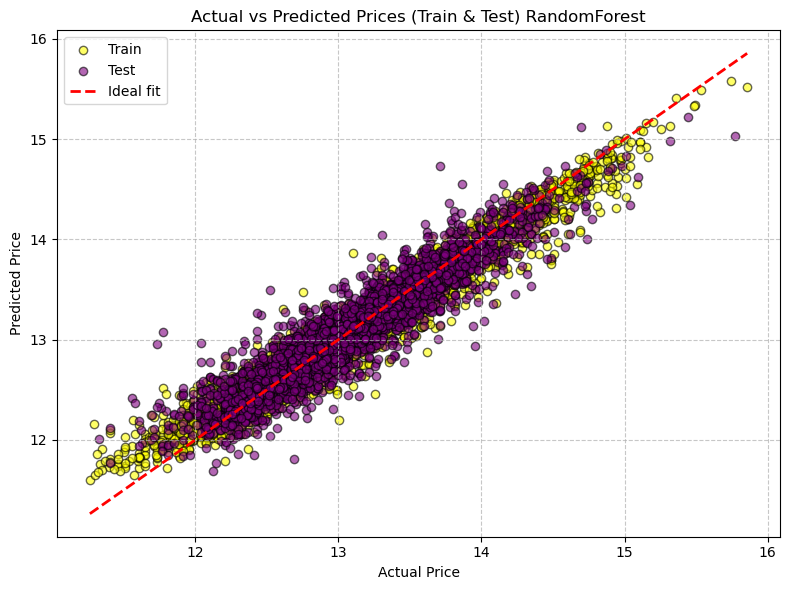

In [107]:
plt.figure(figsize=(8, 6))

# Scatter plots for Train and Test
plt.scatter(y_train, y_train_pred, color='yellow', alpha=0.6, edgecolor='k', label='Train')
plt.scatter(y_test, y_test_pred, color='purple', alpha=0.6, edgecolor='k', label='Test')

# Ideal line (perfect prediction)
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal fit')

# Labels and formatting
plt.title('Actual vs Predicted Prices (Train & Test) RandomForest')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [108]:
X=house_scale.drop(['price_log'], axis=1)
y=house_scale.price_log

In [109]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#KNN Regressor
xgbo = xgb.XGBRegressor(
    subsample = 0.9, 
    reg_lambda = 2, 
    reg_alpha = 0.5, 
    n_estimators= 100, 
    max_depth= 5, 
    learning_rate= 0.1, 
    gamma= 0, 
    colsample_bytree= 0.6,
    random_state=42)

xgbo.fit(X_train, y_train)

y_test_pred=xgbo.predict(X_test)
y_train_pred=xgbo.predict(X_train)

# Evaluation_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test set")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R-squared Score: {r2_test:.2f}")

# Evaluation_train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train set")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R-squared Score: {r2_train:.2f}")

Test set
Mean Squared Error: 0.03
R-squared Score: 0.88
Train set
Mean Squared Error: 0.03
R-squared Score: 0.90


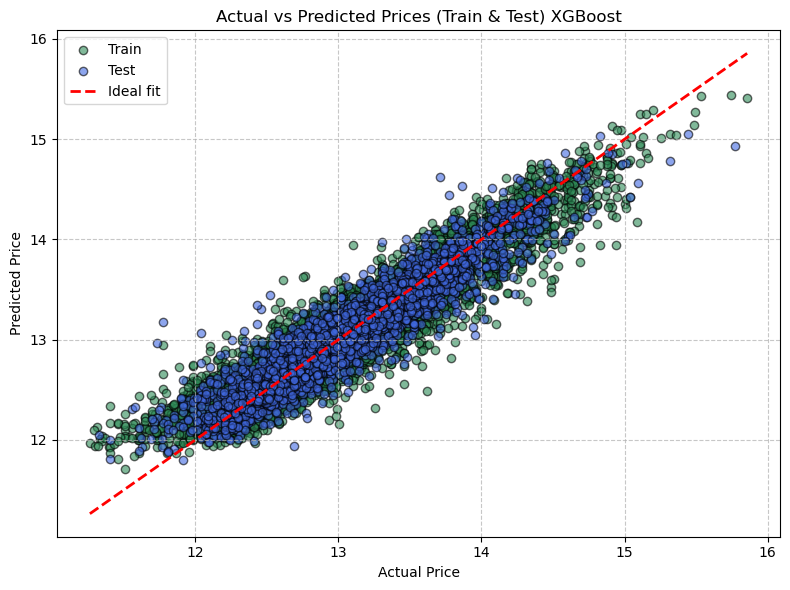

In [110]:
plt.figure(figsize=(8, 6))

# Scatter plots for Train and Test
plt.scatter(y_train, y_train_pred, color='seagreen', alpha=0.6, edgecolor='k', label='Train')
plt.scatter(y_test, y_test_pred, color='royalblue', alpha=0.6, edgecolor='k', label='Test')

# Ideal line (perfect prediction)
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal fit')

# Labels and formatting
plt.title('Actual vs Predicted Prices (Train & Test) XGBoost')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

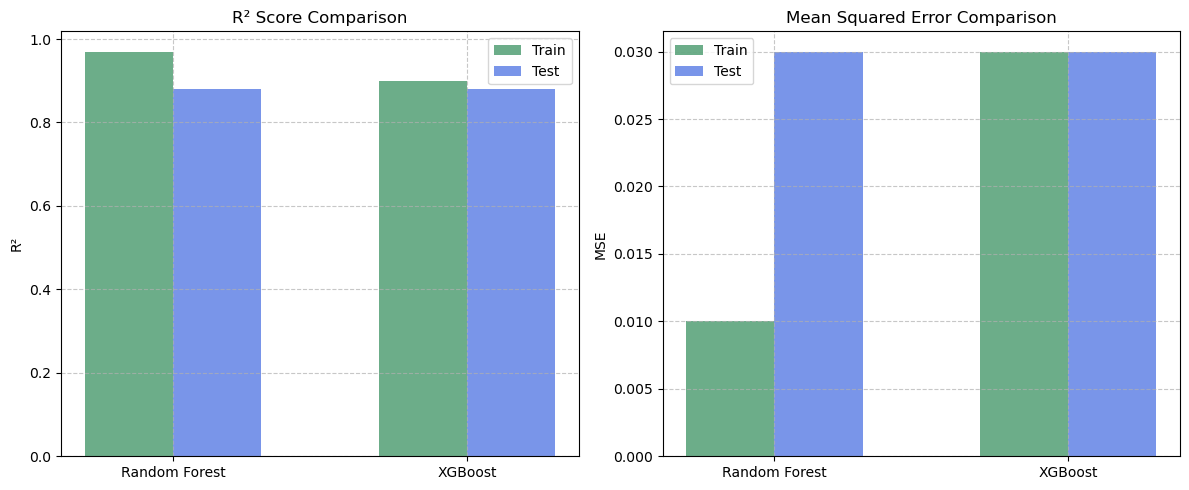

In [116]:
# Performance metrics
models = ['Random Forest', 'XGBoost']

# Values you provided
r2_train = [0.97, 0.90]
r2_test = [0.88, 0.88]
mse_train = [0.01, 0.03]
mse_test = [0.03, 0.03]

x = np.arange(len(models))
width = 0.3  # bar width

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ---- R² comparison ----
ax[0].bar(x - width/2, r2_train, width, label='Train', color='seagreen', alpha=0.7)
ax[0].bar(x + width/2, r2_test, width, label='Test', color='royalblue', alpha=0.7)
ax[0].set_title('R² Score Comparison')
ax[0].set_ylabel('R²')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()
ax[0].grid(True, linestyle='--', alpha=0.7)

# ---- MSE comparison ----
ax[1].bar(x - width/2, mse_train, width, label='Train', color='seagreen', alpha=0.7)
ax[1].bar(x + width/2, mse_test, width, label='Test', color='royalblue', alpha=0.7)
ax[1].set_title('Mean Squared Error Comparison')
ax[1].set_ylabel('MSE')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

🧮 RandomForest vs Xgboost after randomizedsearchCV

R² Comparison:

Random Forest fits the training data more tightly (R² = 0.97 vs 0.90).

Both perform equally well on the test set (R² = 0.88).
→ Random Forest shows slightly more overfitting. 

MSE Comparison:

Random Forest has a smaller training MSE (0.01 vs 0.03).

Test MSE is identical for both (0.03).
→ XGBoost generalizes slightly better (less overfitting), while Random Forest performs marginally better on training data. 

Overall, XGBoost is more balanced, more stable and generalizes better.